In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

In [12]:
df=pd.read_csv("train (1).csv")

In [15]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [13]:
df.shape

(800, 22)

In [14]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.50,231.08,1.00,200.75,400.50,600.25,800.00
A1_Score,800.0,0.56,0.50,0.00,0.00,1.00,1.00,1.00
A2_Score,800.0,0.53,0.50,0.00,0.00,1.00,1.00,1.00
A3_Score,800.0,0.45,0.50,0.00,0.00,0.00,1.00,1.00
A4_Score,800.0,0.42,0.49,0.00,0.00,0.00,1.00,1.00
A5_Score,800.0,0.40,0.49,0.00,0.00,0.00,1.00,1.00
A6_Score,800.0,0.30,0.46,0.00,0.00,0.00,1.00,1.00
A7_Score,800.0,0.40,0.49,0.00,0.00,0.00,1.00,1.00
A8_Score,800.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
A9_Score,800.0,0.50,0.50,0.00,0.00,0.00,1.00,1.00


In [16]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [17]:
df['relation'].value_counts()

,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [18]:

df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

In [21]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

In [22]:
ints.remove('ID')
ints.remove('Class/ASD')

<ipython-input-29-e4b7d6323ad3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)
<ipython-input-29-e4b7d6323ad3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(df[col], palette='pastel')
<ipython-input-29-e4b7d6323ad3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(df[col], palette='pastel')
<ipython-input-29-e4b7d6323ad3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(df[col], palette=

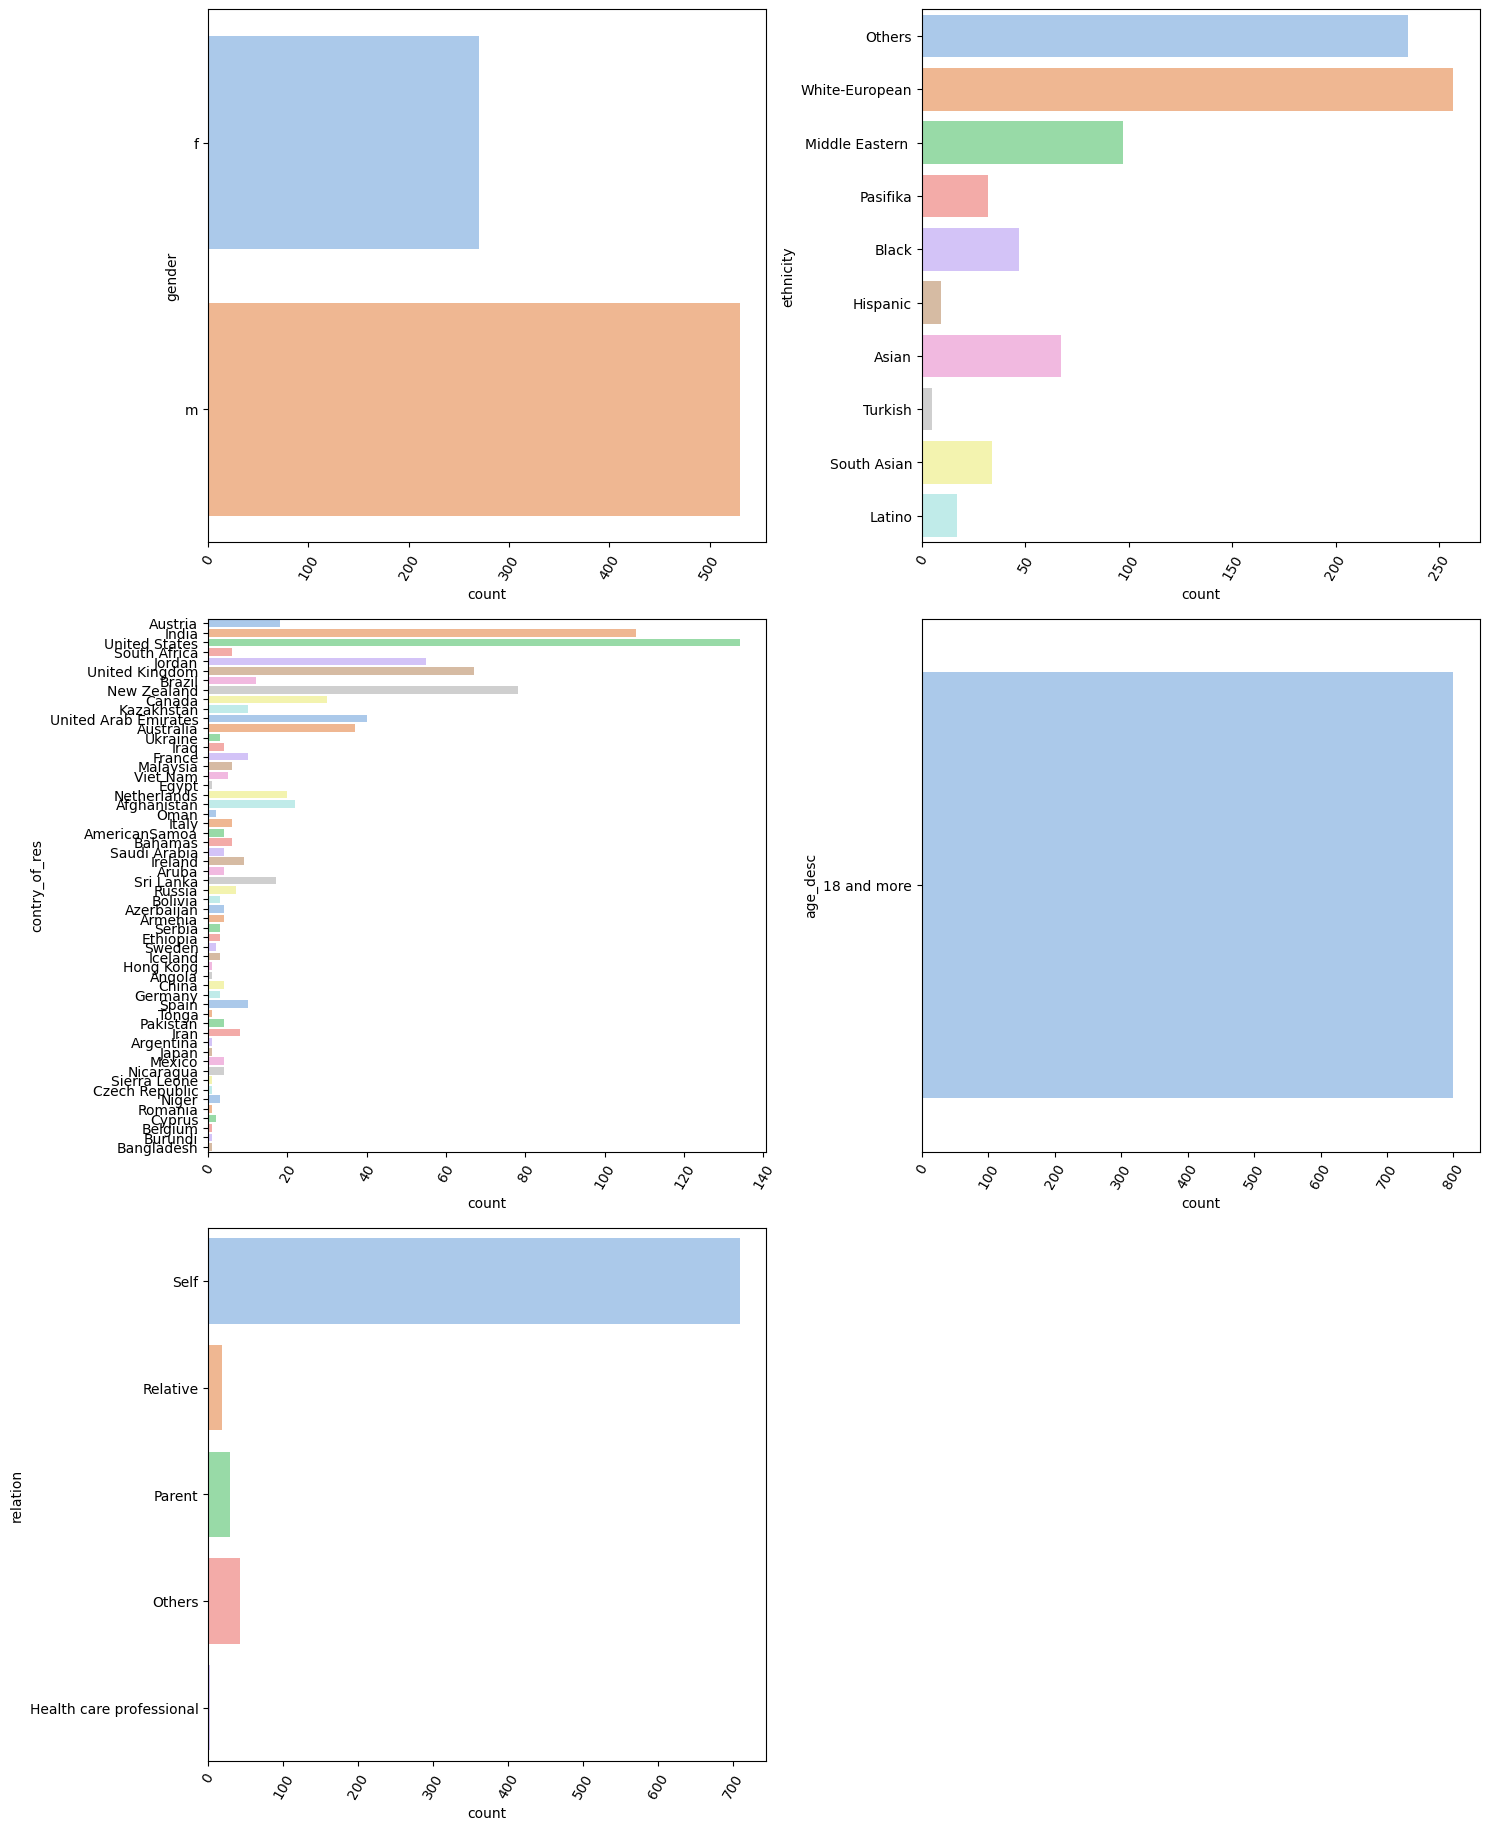

In [29]:
plt.subplots(figsize=(15,30))

for i, col in enumerate(objects):
  plt.subplot(5,2,i+1)
  sb.countplot(df[col], palette='pastel')
  plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<ipython-input-31-9cab8e6ffca6>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)


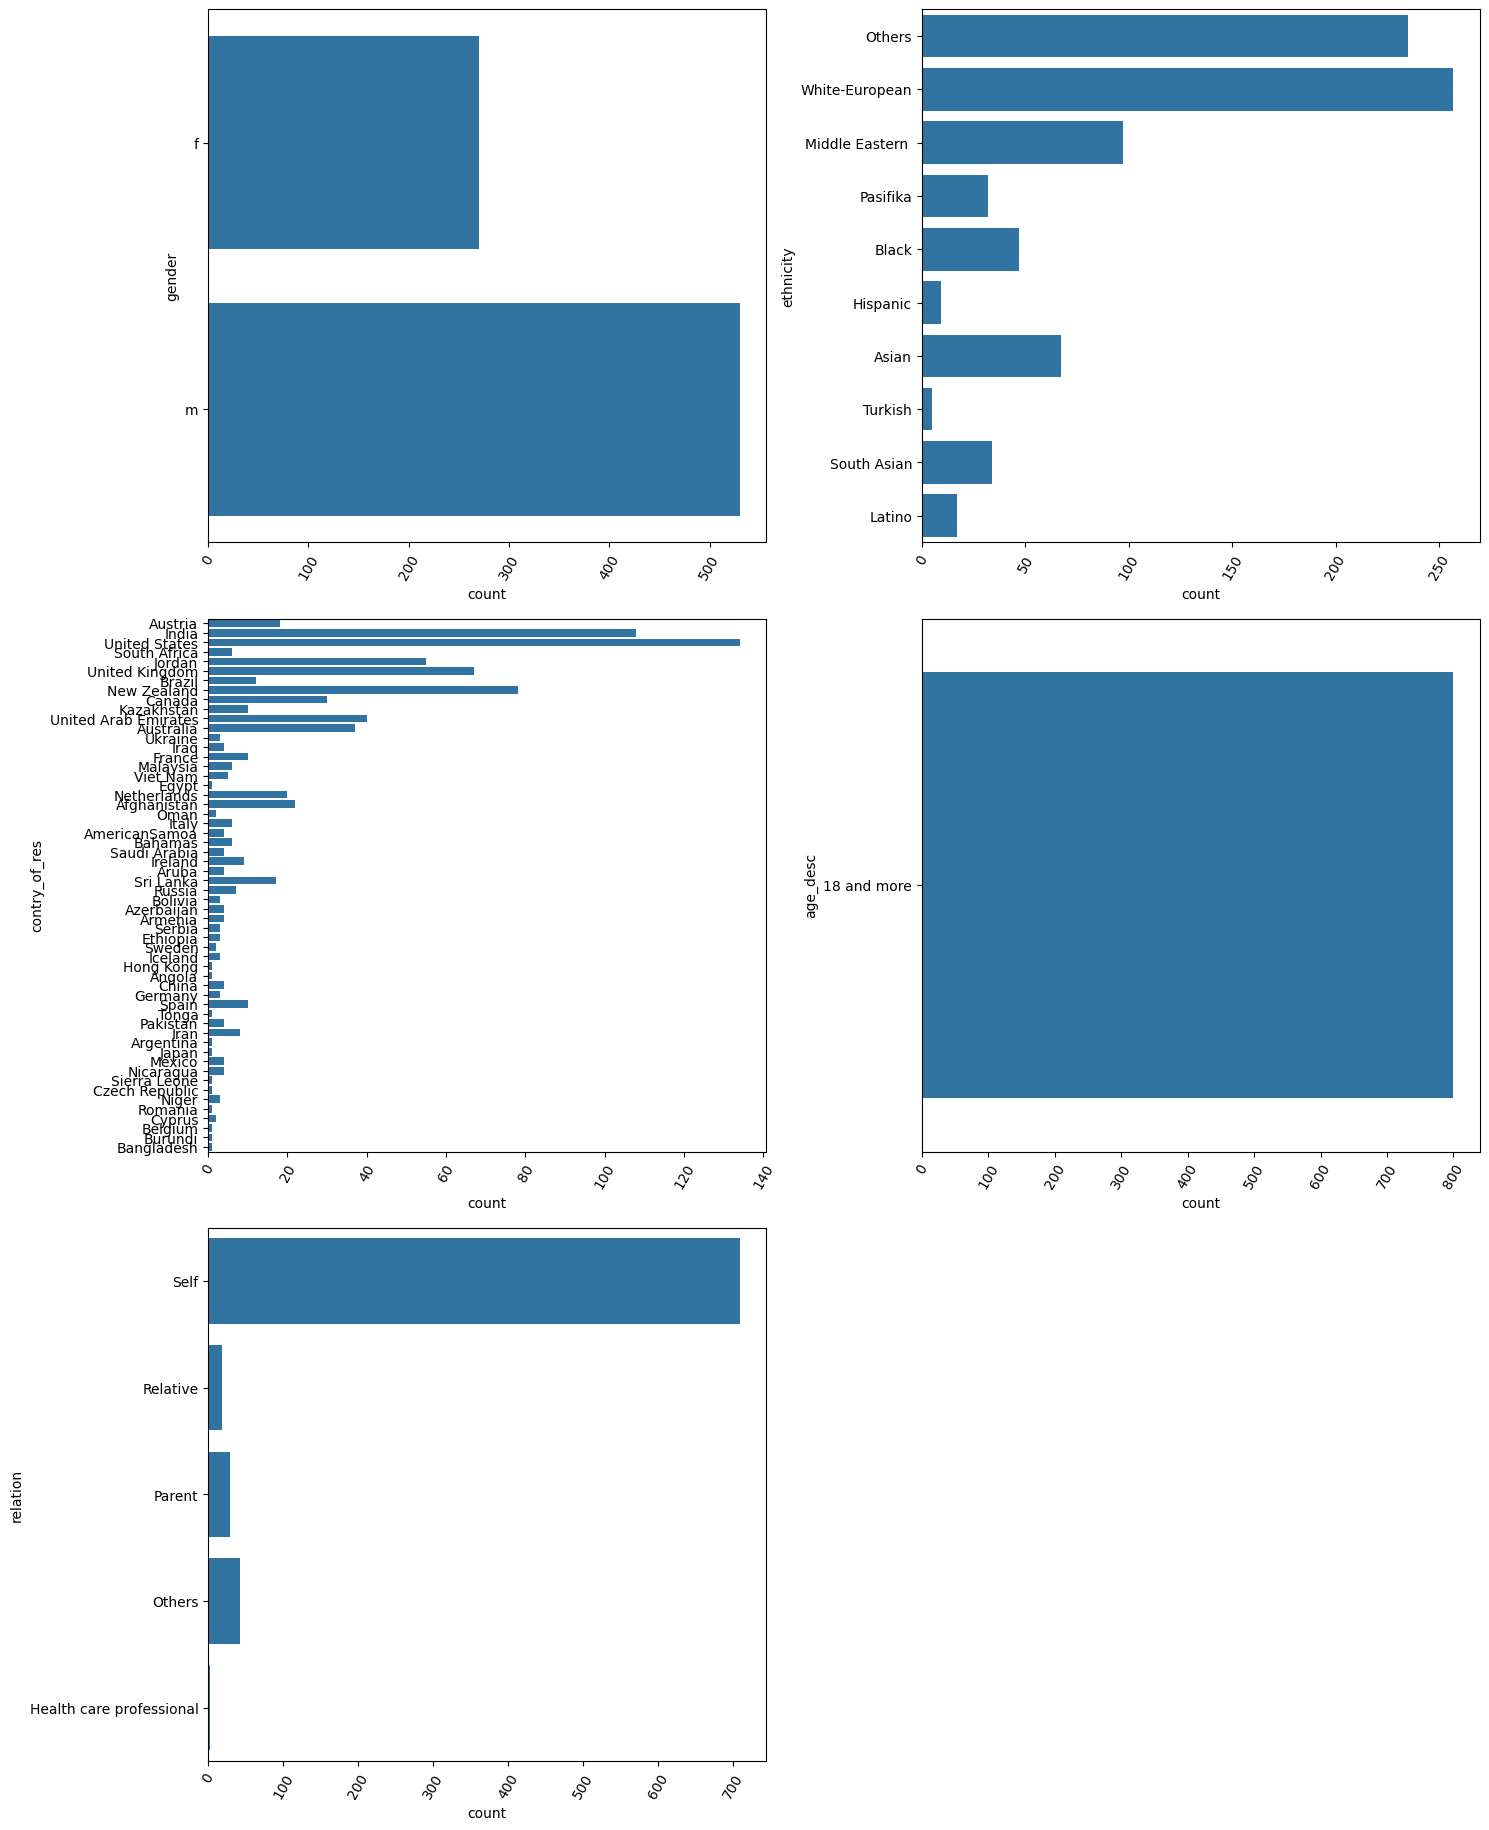

In [31]:
plt.subplots(figsize=(15,30))

for i, col in enumerate(objects):
  plt.subplot(5,2,i+1)
  sb.countplot(df[col])
  plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [32]:
df['jaundice'].value_counts()

,count
jaundice,
0,615
1,185


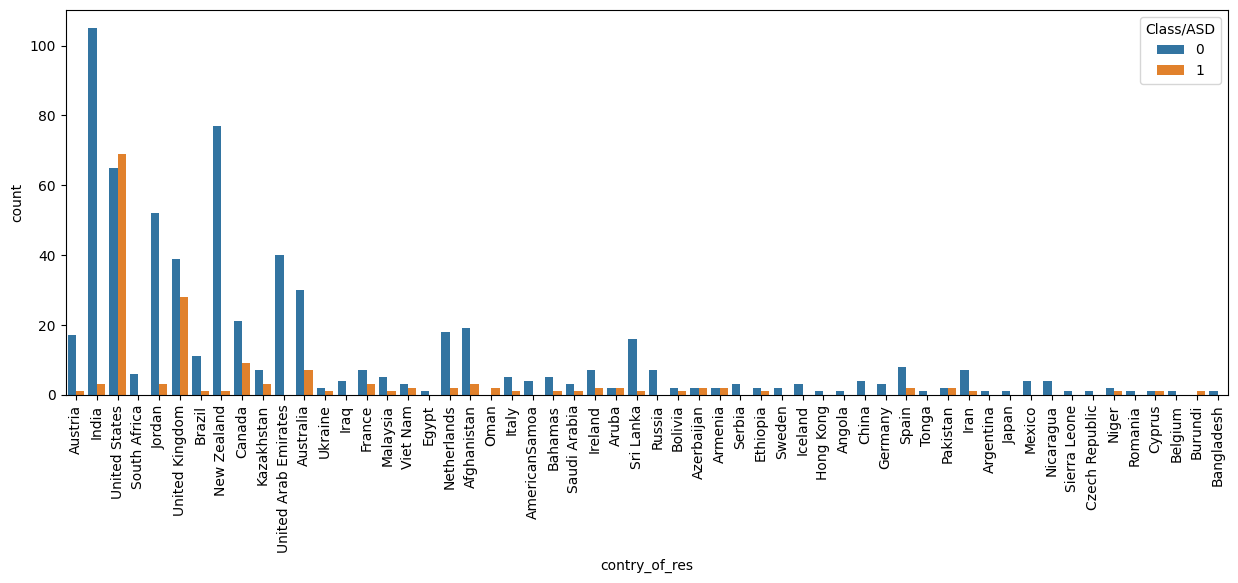

In [33]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

In [34]:
df = df[df['result']>-5]
df.shape

(798, 22)

In [35]:
df['age'] = df['age'].apply(lambda x: np.log(x))

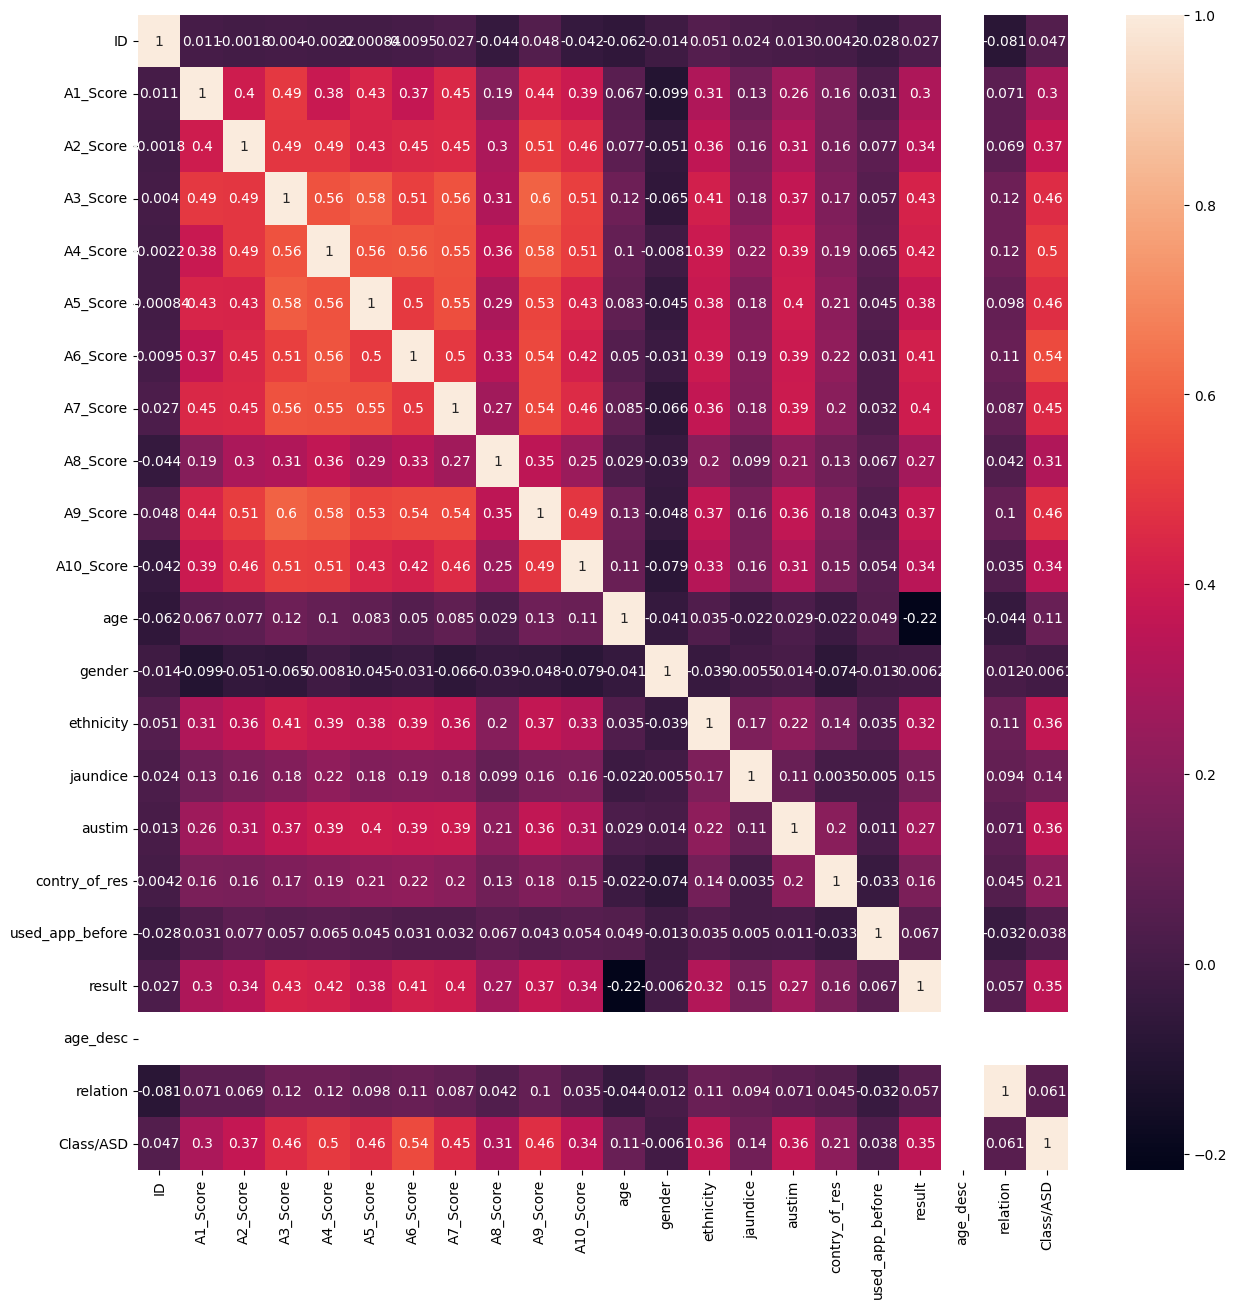

In [37]:
def encode_labels(data):
    for col in data.columns:
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)

plt.figure(figsize=(15,15))
sb.heatmap(df.corr(), annot=True)
plt.show()


In [38]:
removal = ['ID', 'age_desc', 'used_app_before']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [40]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()

LogisticRegression() : 
Training Accuracy :  0.8703703703703703
Validation Accuracy :  0.7741935483870966

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.721326164874552

SVC() : 
Training Accuracy :  0.9376218323586742
Validation Accur